In [1]:
# Tensorflow and tf.keras

import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.18.0


This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images.

In [2]:
# Import and load the fashion_mnist dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Since the class names are not included with the dataset, store them here to use later when plotting the images:

In [3]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

## Data Exploration
Let's explore the format of the dataset before training the model
60,000 images in the training set, with each image represented as 28 x 28 pixels
60,000 labels in the training set
Each label is an integer between 0 and 9

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels
10,000 labels

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

## Preprocess The data
The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:


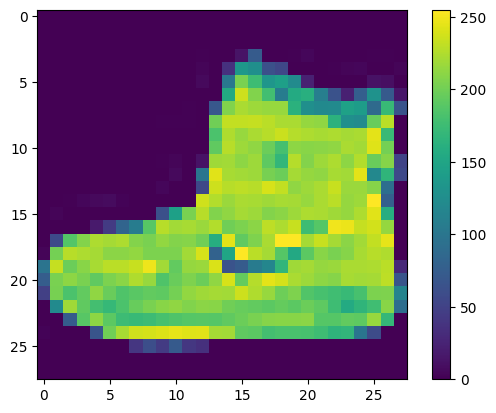

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

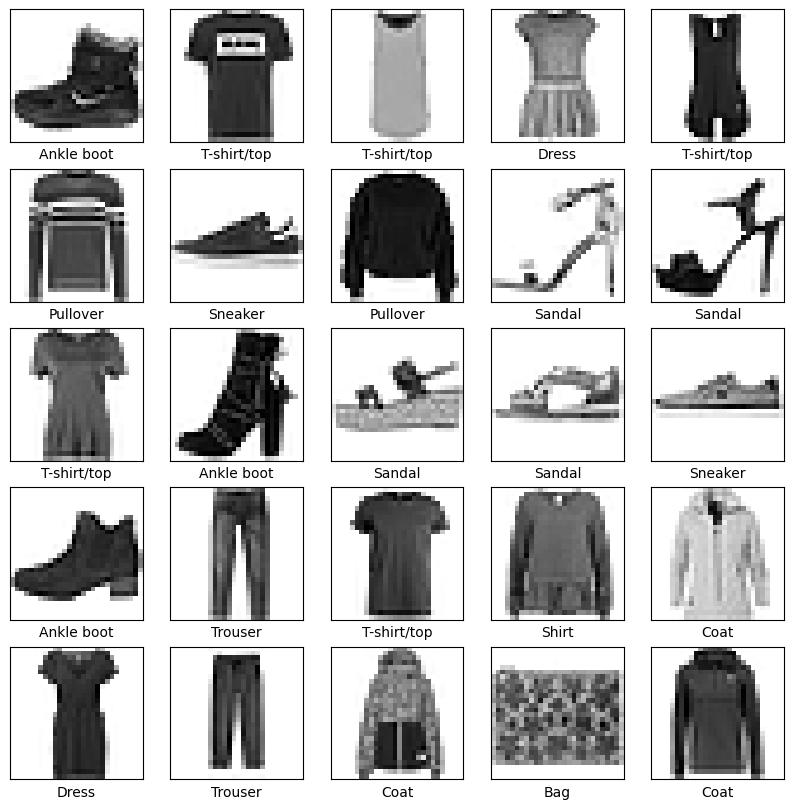

In [11]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Build the model
Building the neural network requires configuring the layers of the model, then compiling the model.

## Set up the layers
The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as tf.keras.layers.Dense, have parameters that are learned during training.

In [ ]:
model = tf.keras.Sequential(
    [
        # Transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) 
        # to a one-dimensional array (of 28 * 28 = 784 pixels).
        tf.keras.layers.Flatten(input_shape=(28, 28)),

        # These are densely connected, or fully connected, neural layers.
        # The first argument is the number of nodes in the layer, in this case, 128 nodes.
        tf.keras.layers.Dense(128, activation="relu"),

        # The second (and last) layer returns a logits array with length of 10.
        # Each node contains a score that indicates the current image belongs to one of the 10 classes.
        tf.keras.layers.Dense(10),
    ]
)

## Compile The Model

1. Optimizer - This is how the model is updated based on the data it sees and its loss function.
2. Loss function - This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
3. Metrics - Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [14]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

## Train the model

In [15]:
# Feed the model

model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7749 - loss: 0.6353
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8625 - loss: 0.3823
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8799 - loss: 0.3367
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8872 - loss: 0.3066
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8919 - loss: 0.2921
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8945 - loss: 0.2857
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9011 - loss: 0.2636
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9053 - loss: 0.2547
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9080 - loss: 0.2471
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9107 - loss: 0.2386


In [16]:
# Evaluate accuracy

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print("\nTest accuracy:", test_acc)

313/313 - 2s - 5ms/step - accuracy: 0.8810 - loss: 0.3434

Test accuracy: 0.8809999823570251


In [17]:
# Make predictions

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [18]:
predictions[0]

array([3.5661092e-09, 1.0915191e-09, 3.0075550e-10, 2.7485089e-10,
       2.4706909e-08, 2.7230685e-04, 5.5750039e-08, 2.0290883e-02,
       5.4748517e-09, 9.7943670e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [19]:
np.argmax(predictions[0])

np.int64(9)

So, the model is most confident that this image is an ankle boot, or class_names[9]. Examining the test label shows that this classification is correct:

In [20]:
test_labels[0]

np.uint8(9)

Define functions to graph the full set of 10 class predictions.

In [21]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"

    plt.xlabel(
        "{} {:2.0f}% ({})".format(
            class_names[predicted_label],
            100 * np.max(predictions_array),
            class_names[true_label],
        ),
        color=color,
    )


def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")

### Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

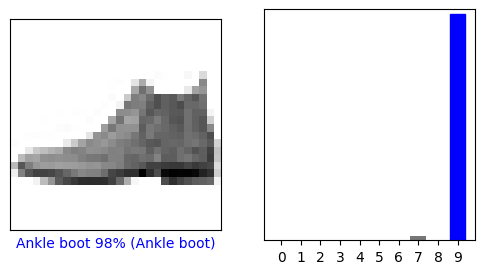

In [22]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

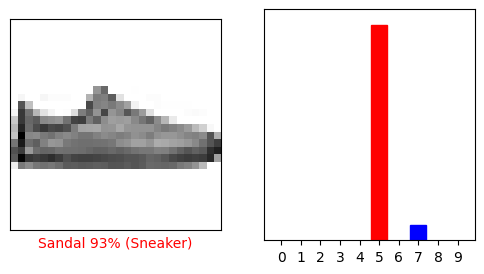

In [23]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

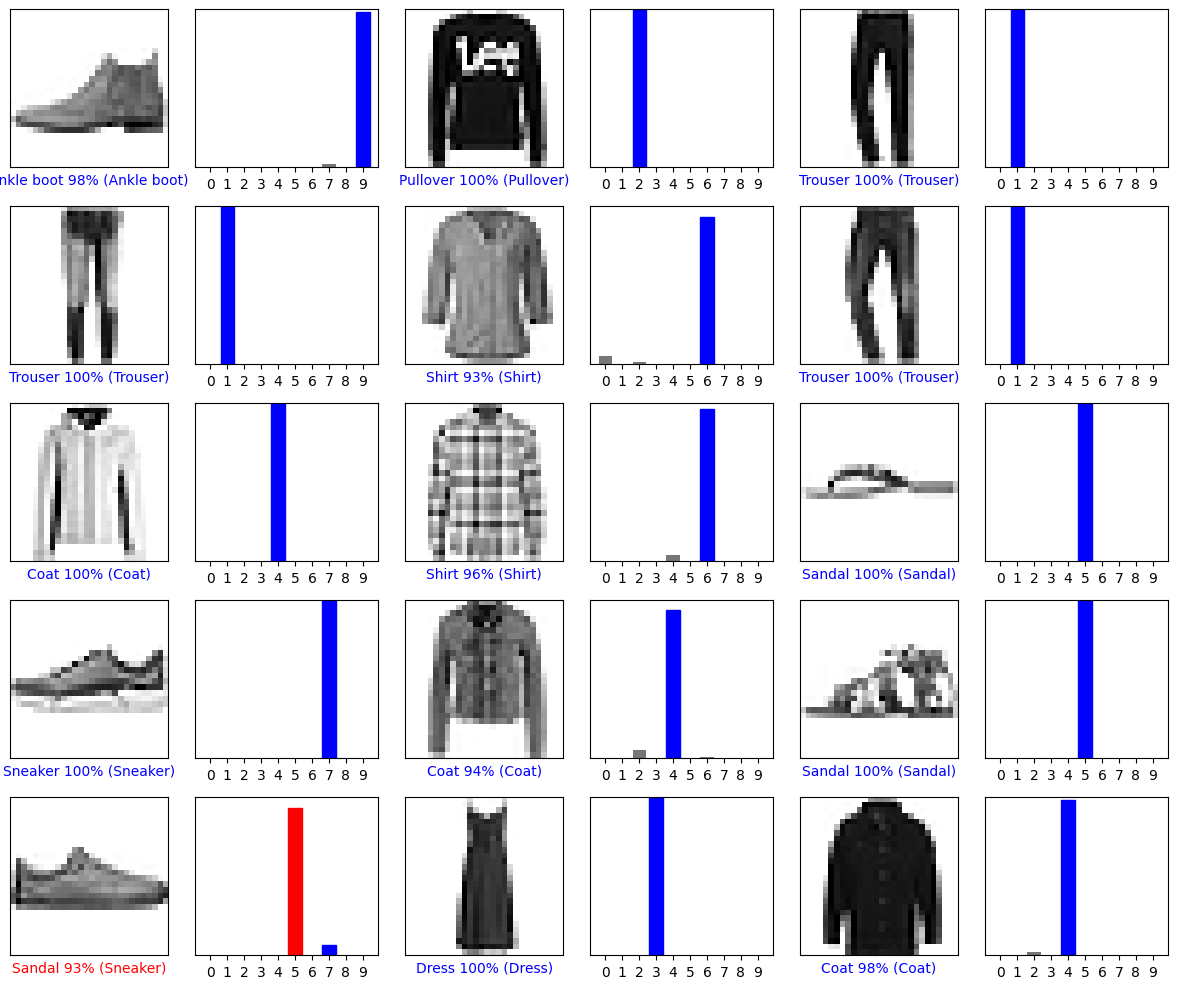

In [24]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [25]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [26]:
# Add the image to a batch where it's the only member.
img = np.expand_dims(img, 0)

print(img.shape)

(1, 28, 28)


In [27]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
[[9.2067066e-06 7.5122401e-13 9.9813807e-01 4.5634381e-14 1.7100865e-03
  3.4248077e-10 1.4263195e-04 4.3364216e-17 1.8764391e-10 2.9851081e-14]]


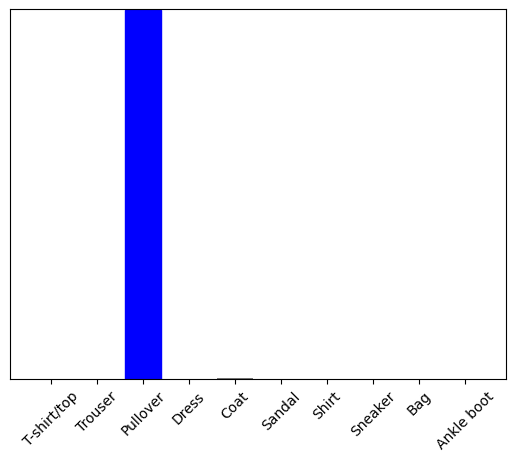

In [28]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

tf.keras.Model.predict returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [29]:
np.argmax(predictions_single[0])

np.int64(2)

And the model predicts a label as expected.